In [1]:
%reload_ext autoreload
%autoreload 2
import tensorflow as tf
import sys
sys.path.append('../../pytools')
import d2l

d2l.gpu_mem_init()

2025-09-09 16:09:07.527266: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-09 16:09:07.590200: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-09 16:09:09.037501: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


Memory growth enabled for PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'): True


In [2]:
batch_size = 256
mi_train,mi_test = d2l.load_data_fashion_mnist(batch_size)

I0000 00:00:1757405350.363129 3077799 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 30239 MB memory:  -> device: 0, name: Tesla V100-SXM2-32GB, pci bus id: 0000:00:08.0, compute capability: 7.0


In [3]:
num_inputs,num_hiddens,num_outputs = 784,256,10
w1 = tf.Variable(tf.random.normal(shape=(num_inputs, num_hiddens)), mean=0.0, stddev=0.01)
b1 = tf.Variable(tf.zeros(num_hiddens))
w2 = tf.Variable(tf.random.normal(shape=(num_hiddens, num_outputs)), mean=0.0, stddev=0.01)
b2 = tf.Variable(tf.zeros(num_outputs))

In [4]:
def relu(x):
    return tf.math.maximum(x, 0)
def net(x):
    x = tf.reshape(x, (-1, w1.shape[0]))
    h = relu(tf.matmul(x, w1) + b1)
    return tf.matmul(h, w2) + b2

In [5]:
def loss(y_hat, y):
    return tf.losses.sparse_categorical_crossentropy(y, y_hat, from_logits=True)

epoch:9, train_loss:0.715013, train_auc:0.798733


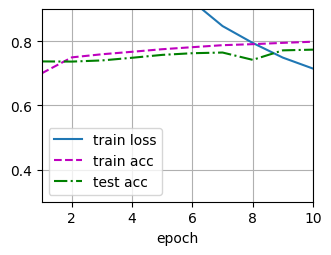

In [6]:
num_epochs = 10
lr = 0.1
updater = d2l.Updater([w1, w2, b1, b2], lr)
d2l.train_ch3(net, mi_train, mi_test, loss, num_epochs, updater)

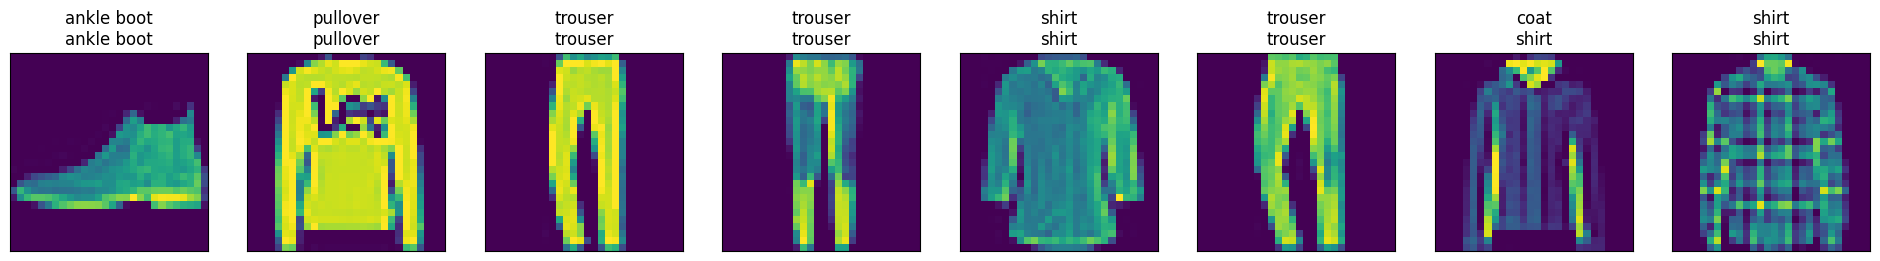

In [7]:
d2l.predict_ch3(net, mi_test)